Driving Customer Loyalty: Uncovering Churn Drivers in Telecom
- Situation: Our telecom business faces customer churn, which risks reducing revenue and customer lifetime value. This project will analyze the Customer Churn dataset to identify why customers are leaving and quantify the extent of churn. By pinpointing key factors driving churn, we aim to develop targeted retention strategies to improve customer loyalty and business outcomes.
- Objective: To analyze the Customer Churn dataset to quantify the churn rate and identify key factors driving customer attrition, such as contract type, tenure, and service costs. By leveraging exploratory data analysis, we aim to uncover actionable insights to inform targeted retention strategies. Ultimately, our goal is to reduce churn, enhance customer loyalty, and improve business outcomes for the telecom company.
- Project Workflow: This project begins with loading and cleaning the Customer Churn dataset, addressing missing values in TotalCharges by filling them with 0 for new customers (tenure=0). We will then conduct exploratory data analysis (EDA) to calculate the churn rate and examine relationships between churn and key features like contract type, tenure, and monthly charges using visualizations such as bar plots and histograms. Finally, we will derive actionable insights from these patterns to recommend retention strategies, ensuring all steps are executed using Python with pandas and seaborn for data processing and visualization.

Data Preparation & Cleaning

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df_CC = pd.read_csv('Customer-Churn.csv')

In [3]:
# Check the first few rows of the dataframe
df_CC.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check the Non-Null count and data types of each column
df_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check for missing values in each column
missing_values = df_CC.apply(lambda x: x.str.strip().eq('') if x.dtype == "object" else x.isna()).sum()
"Columns with empty strings or whitespace:"
missing_values[missing_values > 0]

TotalCharges    11
dtype: int64

In [6]:
# Confirm missing values in Total Charges column
df_CC['TotalCharges'].value_counts().head()

TotalCharges
20.2     11
         11
19.75     9
19.65     8
19.9      8
Name: count, dtype: int64

In [7]:
# Convert 'TotalCharges' to numeric
df_CC['TotalCharges'] = pd.to_numeric(df_CC['TotalCharges'], errors='coerce')

In [8]:
# Check to make sure the conversion worked
df_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Count the number of NaN values in 'TotalCharges' column
df_CC['TotalCharges'].isna().sum()

np.int64(11)

In [10]:
# Impute missing values: The 11 missing TotalCharges values correspond to rows where tenure=0, meaning these customers are new and haven’t accrued charges. Setting TotalCharges=0 reflects this reality without introducing artificial values.

# Fill missing TotalCharges to 0 
df_CC['TotalCharges'] = df_CC['TotalCharges'].fillna(0)

# Verify Results
df_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Remove irrelevant columns i.e. customerID
df_CC = df_CC.drop(columns=['customerID'])

# Verify that column was dropped
df_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
# Convert Data Types 'object' to 'category' to optimize memory and enable efficient encoding for modeling
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                   'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
df_CC[categorical_cols] = df_CC[categorical_cols].astype('category')

# Verify all datatypes
df_CC.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [13]:
# Check for any unique values in any of the 17 Category Columns 
for col in categorical_cols:
    print(f"\nUnique values in {col}:", df_CC[col].unique().tolist())


Unique values in gender: ['Female', 'Male']

Unique values in SeniorCitizen: [0, 1]

Unique values in Partner: ['Yes', 'No']

Unique values in Dependents: ['No', 'Yes']

Unique values in PhoneService: ['No', 'Yes']

Unique values in MultipleLines: ['No phone service', 'No', 'Yes']

Unique values in InternetService: ['DSL', 'Fiber optic', 'No']

Unique values in OnlineSecurity: ['No', 'Yes', 'No internet service']

Unique values in OnlineBackup: ['Yes', 'No', 'No internet service']

Unique values in DeviceProtection: ['No', 'Yes', 'No internet service']

Unique values in TechSupport: ['No', 'Yes', 'No internet service']

Unique values in StreamingTV: ['No', 'Yes', 'No internet service']

Unique values in StreamingMovies: ['No', 'Yes', 'No internet service']

Unique values in Contract: ['Month-to-month', 'One year', 'Two year']

Unique values in PaperlessBilling: ['Yes', 'No']

Unique values in PaymentMethod: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card

Exploratory Data Analysis (EDA)

In [14]:
# Calculate the Churn Rate
churn_rate = df_CC['Churn'].value_counts(normalize=True) * 100
print(f"Retained (No): {churn_rate['No']:.1f}%")
print(f"Churned (Yes): {churn_rate['Yes']:.1f}%")

Retained (No): 73.5%
Churned (Yes): 26.5%


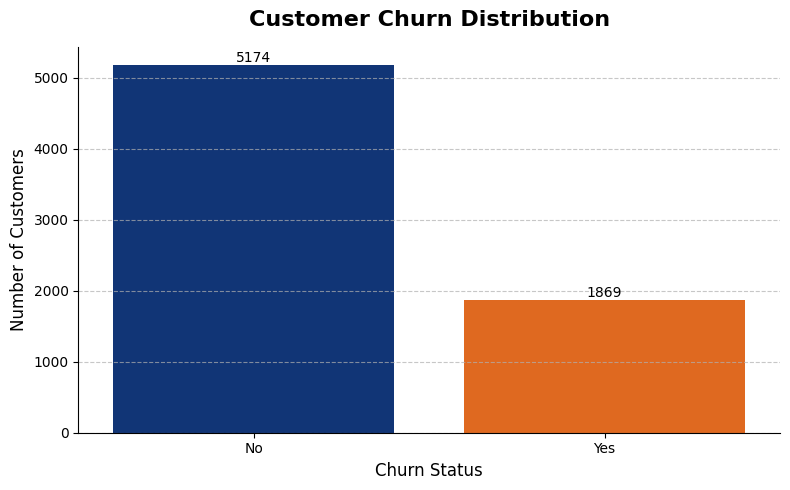

In [15]:
# Churn Distribution Plot
plt.figure(figsize=(8, 5), facecolor='white')
ax = sns.countplot(x='Churn', hue='Churn', data=df_CC, palette=['#003087', '#FF6200'], legend=False)
ax.set_title('Customer Churn Distribution', fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Churn Status', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, color='black', label_type='edge')
plt.tight_layout()
plt.show()

In [16]:
# Contract Type: Churn Calculations
contract_churn = df_CC.groupby('Contract', observed=False)['Churn'].value_counts(normalize=True).unstack() * 100
contract_churn['Yes'].sort_values(ascending=False)

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Yes, dtype: float64

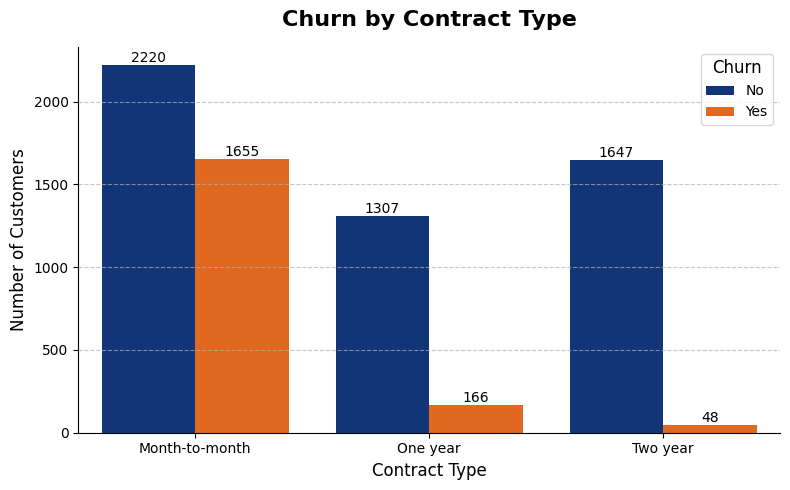

In [17]:
# Contract Type Plot
plt.figure(figsize=(8, 5), facecolor='white')
ax = sns.countplot(x='Contract', hue='Churn', data=df_CC, palette=['#003087', '#FF6200'])
ax.set_title('Churn by Contract Type', fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Contract Type', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.legend(title='Churn', fontsize=10, title_fontsize=12, loc='upper right')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, color='black', label_type='edge')
plt.tight_layout()
plt.show()

In [18]:
# Churn by Tenure (binned)
df_CC['tenure_bin'] = pd.cut(df_CC['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
tenure_churn = df_CC.groupby('tenure_bin', observed=False)['Churn'].value_counts(normalize=True).unstack() * 100
tenure_churn['Yes'].sort_values(ascending=False)

tenure_bin
0-12     47.678161
13-24    28.710938
25-36    21.634615
37-48    19.028871
49-60    14.423077
61-72     6.609808
Name: Yes, dtype: float64

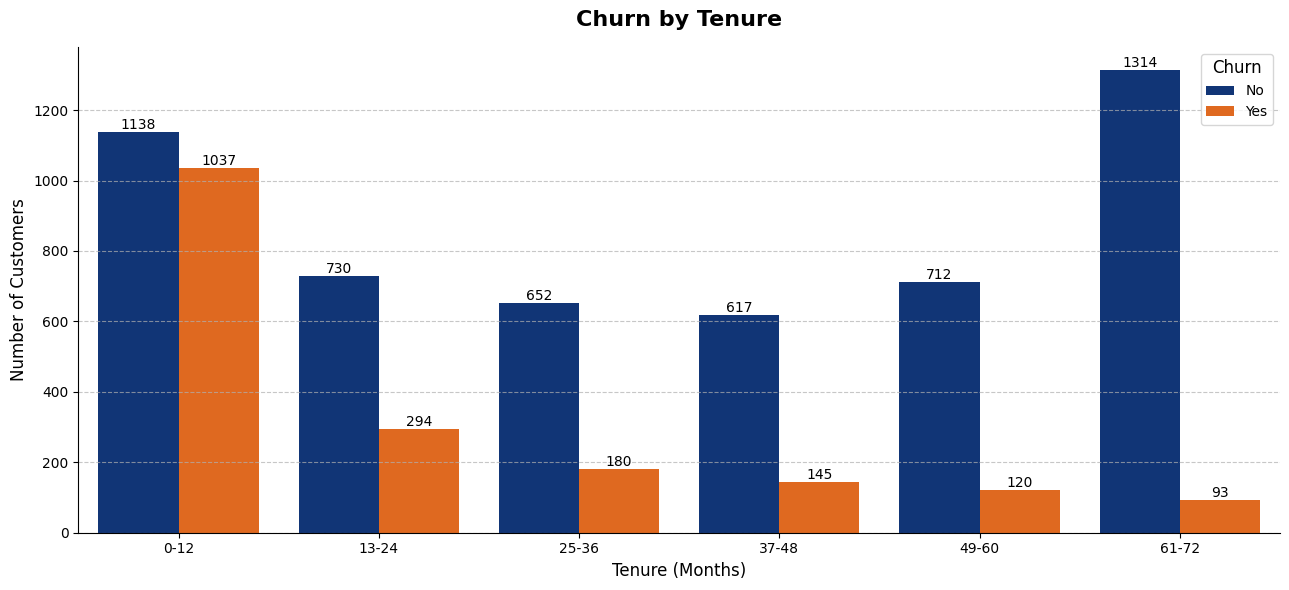

In [19]:
# Tenure Plot
plt.figure(figsize=(13, 6), facecolor='white')
ax = sns.countplot(x='tenure_bin', hue='Churn', data=df_CC, palette=['#003087', '#FF6200'])
ax.set_title('Churn by Tenure', fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Tenure (Months)', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.legend(title='Churn', fontsize=10, title_fontsize=12, loc='upper right')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, color='black', label_type='edge')
plt.tight_layout()
plt.show()

In [20]:
# Churn by Monthly Charges (binned)
df_CC['charges_bin'] = pd.cut(df_CC['MonthlyCharges'], bins=[0, 40, 80, 120], labels=['Low (<$40)', 'Medium ($40-80)', 'High (>$80)'])
charges_churn = df_CC.groupby('charges_bin', observed=False)['Churn'].value_counts(normalize=True).unstack() * 100
charges_churn['Yes'].sort_values(ascending=False)

charges_bin
High (>$80)        33.983496
Medium ($40-80)    29.499803
Low (<$40)         11.643090
Name: Yes, dtype: float64

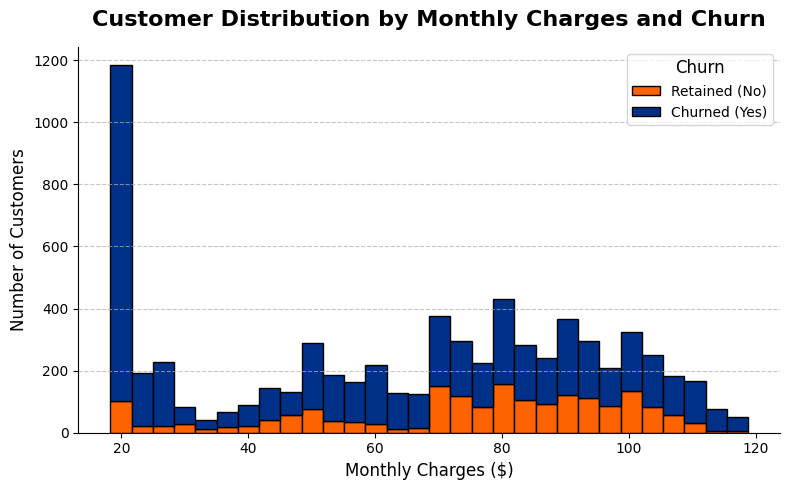

In [21]:
# Monthly Charges Stacked Histogram
plt.figure(figsize=(8, 5), facecolor='white')
ax = sns.histplot(data=df_CC, x='MonthlyCharges', hue='Churn', multiple='stack', palette=['#003087', '#FF6200'], bins=30, alpha=1.0)
ax.set_title('Customer Distribution by Monthly Charges and Churn', fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Monthly Charges ($)', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.legend(title='Churn', labels=['Retained (No)', 'Churned (Yes)'], fontsize=10, title_fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

In [22]:
# Churn by Total Charges
total_charges_churn = df_CC.groupby(pd.cut(df_CC['TotalCharges'], bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000], labels=['0-1K', '1K-2K', '2K-3K', '3K-4K', '4K-5K', '5K-6K', '6K-7K', '7K-8K', '8K-9K']), observed=False)['Churn'].value_counts(normalize=True).unstack() * 100
total_charges_churn['Yes'].sort_values(ascending=False)

TotalCharges
0-1K     36.985828
2K-3K    27.607362
1K-2K    20.966485
3K-4K    19.244604
4K-5K    16.764133
5K-6K    15.575621
6K-7K    15.068493
7K-8K    12.048193
8K-9K     3.846154
Name: Yes, dtype: float64

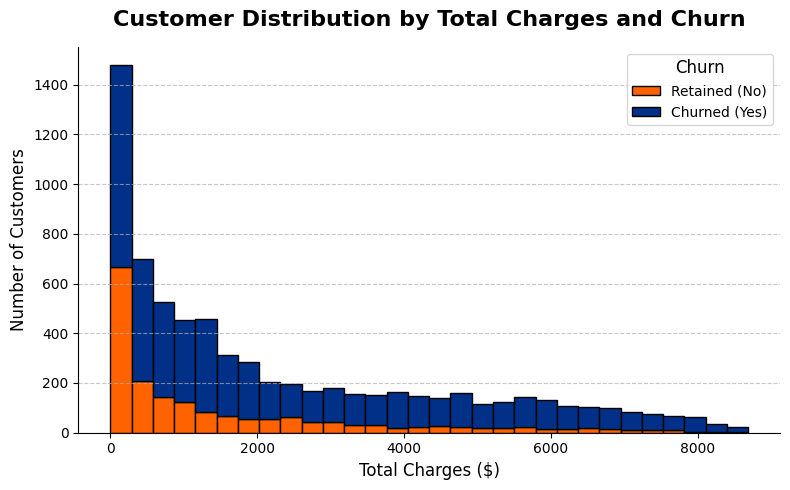

In [23]:
# Total Charges Stacked Histogram
plt.figure(figsize=(8, 5), facecolor='white')
ax = sns.histplot(data=df_CC, x='TotalCharges', hue='Churn', multiple='stack', palette=['#003087', '#FF6200'], bins=30, alpha=1.0)
ax.set_title('Customer Distribution by Total Charges and Churn', fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Total Charges ($)', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.legend(title='Churn', labels=['Retained (No)', 'Churned (Yes)'], fontsize=10, title_fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

In [24]:
# Churn by Internet Service
internet_churn = df_CC.groupby('InternetService', observed=False)['Churn'].value_counts(normalize=True).unstack() * 100
internet_churn['Yes'].sort_values(ascending=False)

InternetService
Fiber optic    41.892765
DSL            18.959108
No              7.404980
Name: Yes, dtype: float64

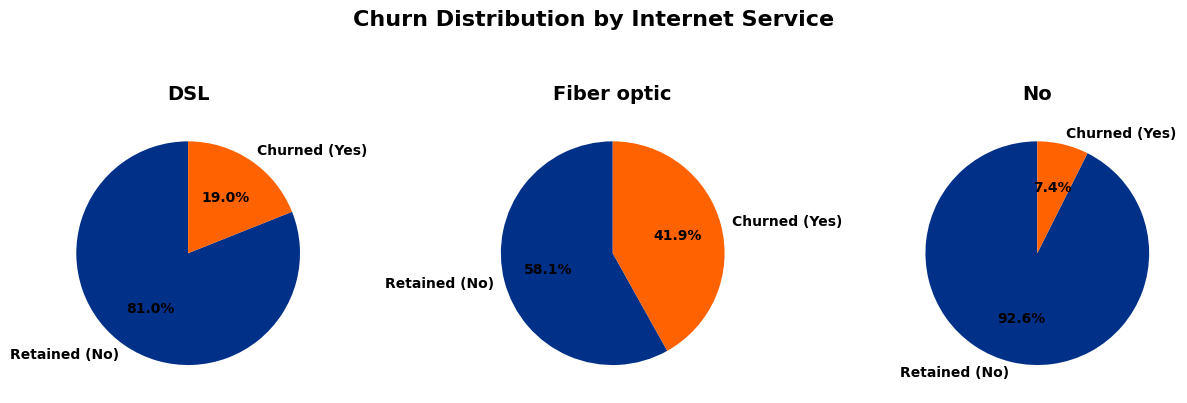

In [25]:
# Prepare and Plot Internet Service data on pie charts
internet_service_types = ['DSL', 'Fiber optic', 'No']
fig, axes = plt.subplots(1, 3, figsize=(12, 4), facecolor='white')
for i, service in enumerate(internet_service_types):
    churn_counts = df_CC[df_CC['InternetService'] == service]['Churn'].value_counts()
    axes[i].pie(churn_counts, labels=['Retained (No)', 'Churned (Yes)'], colors=['#003087', '#FF6200'], 
                autopct='%1.1f%%', textprops={'fontsize': 10, 'weight': 'bold'}, startangle=90)
    axes[i].set_title(f'{service}', fontsize=14, weight='bold', pad=10)
fig.suptitle('Churn Distribution by Internet Service', fontsize=16, weight='bold', y=1.05)
plt.tight_layout()
plt.show()

In [26]:
# Churn by Payment Method
payment_churn = df_CC.groupby('PaymentMethod', observed=False)['Churn'].value_counts(normalize=True).unstack() * 100
payment_churn['Yes'].sort_values(ascending=False)

PaymentMethod
Electronic check             45.285412
Mailed check                 19.106700
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Name: Yes, dtype: float64

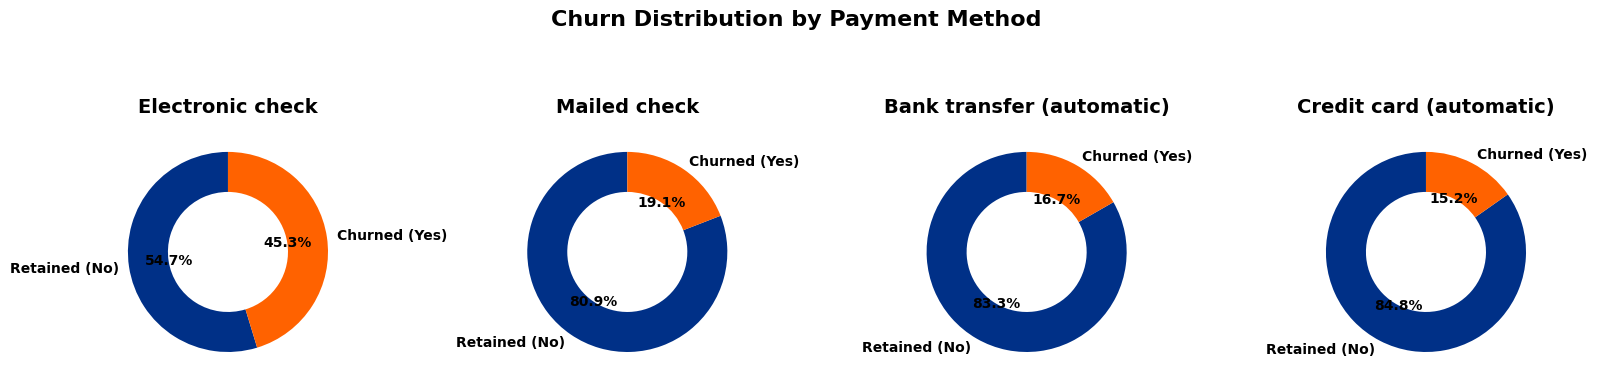

In [27]:
# Prepare and Plot Payment Method data on donut charts
payment_methods = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
fig, axes = plt.subplots(1, 4, figsize=(16, 4), facecolor='white')
for i, method in enumerate(payment_methods):
    churn_counts = df_CC[df_CC['PaymentMethod'] == method]['Churn'].value_counts()
    axes[i].pie(churn_counts, labels=['Retained (No)', 'Churned (Yes)'], colors=['#003087', '#FF6200'], 
                autopct='%1.1f%%', textprops={'fontsize': 10, 'weight': 'bold'}, startangle=90, 
                wedgeprops=dict(width=0.4))  # Creates donut shape
    axes[i].set_title(f'{method}', fontsize=14, weight='bold', pad=10)
fig.suptitle('Churn Distribution by Payment Method', fontsize=16, weight='bold', y=1.05)
plt.tight_layout()
plt.show()

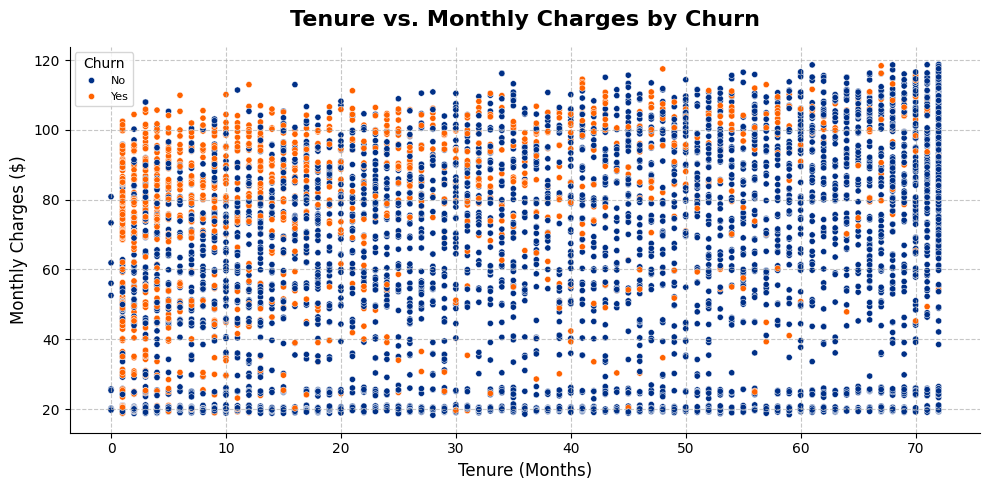

In [28]:
# Scatter Plot of Tenure vs. Monthly Charges with Hue for Churn (combines tenure and charges to show how low tenure high charges drive churn)
plt.figure(figsize=(10, 5), facecolor='white')
ax = sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df_CC, palette=['#003087', '#FF6200'], alpha=1.0, s=20)  # s=20 for smaller markers to handle density
ax.set_title('Tenure vs. Monthly Charges by Churn', fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Tenure (Months)', fontsize=12)
ax.set_ylabel('Monthly Charges ($)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.legend(title='Churn', fontsize=8, title_fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()

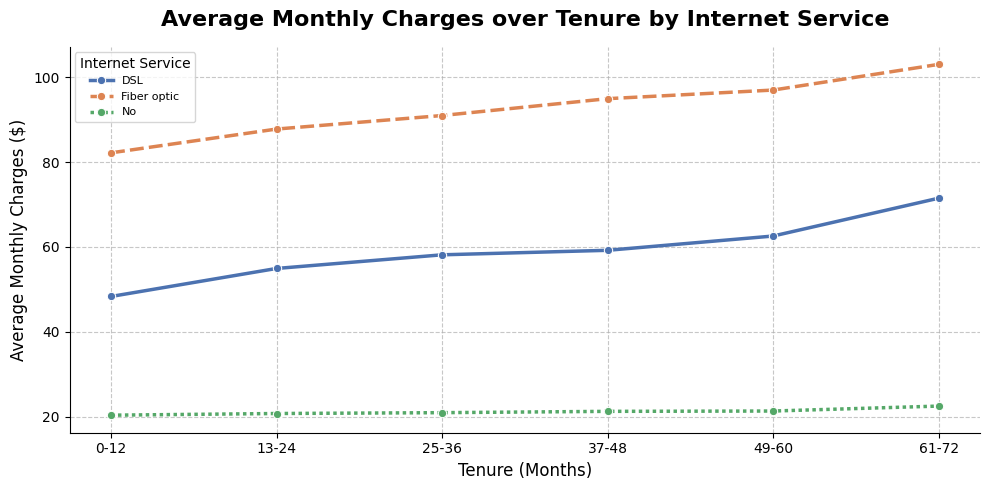

In [29]:
# Line Plot of Average Monthly Charges over Tenure Bins by Internet Service (combines tenure, charges, and service to show how service type affects charge-churn trends over time)
avg_charges = df_CC.groupby(['tenure_bin', 'InternetService'], observed=False)['MonthlyCharges'].mean().unstack()
plt.figure(figsize=(10, 5), facecolor='white')
ax = sns.lineplot(data=avg_charges, palette='deep', marker='o', linewidth=2.5)
ax.set_title('Average Monthly Charges over Tenure by Internet Service', fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Tenure (Months)', fontsize=12)
ax.set_ylabel('Average Monthly Charges ($)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.legend(title='Internet Service', fontsize=8, title_fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()